In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import seaborn as sns
from scipy.stats import norm
import math
import matplotlib

In [2]:
uph_degisim = pd.read_excel('UPH_Degisim.xlsx', index_col='Date')

In [3]:
uph_degisim = uph_degisim/100

In [4]:
uph_degisim.drop(['VOB Nakit Teminatı','ANACM','SODA'],axis=1,inplace=True)

In [5]:
uph_degisim.head()

,O/N BPP,AKBNK,AKSEN,ALARK,ASELS,BIMAS,ENJSA,EREGL,FROTO,GARAN,...,KOZAL,OTKAR,SAHOL,SISE,TCELL,TKFEN,TOASO,TTKOM,VAKBN,YKBNK
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-29,0.000227,-0.034545,0.026071,-0.016364,-0.032895,-0.023035,-0.020955,-0.021092,0.028660,-0.040541,...,0.013730,0.017200,-0.028217,-0.028286,-0.012484,-0.049391,0.011218,-0.023684,-0.011086,-0.031111
2020-07-30,0.000219,-0.013183,-0.005445,0.003697,-0.000567,-0.009015,-0.014269,-0.031686,0.005451,-0.011268,...,-0.024266,-0.019825,-0.026713,-0.011986,-0.011311,0.032389,0.007132,-0.024259,0.008969,-0.018349
2020-08-04,0.000000,-0.036260,-0.082117,-0.049724,-0.020987,-0.093772,-0.004825,0.015707,-0.015663,-0.037037,...,-0.020243,-0.036288,-0.028640,-0.003466,-0.000673,-0.045752,-0.026751,-0.022099,-0.040000,-0.023364
2020-08-05,0.000231,-0.005941,-0.057654,-0.003876,-0.024334,-0.019305,0.047273,0.034794,-0.034884,0.002959,...,0.009445,0.000000,0.007371,0.085217,0.014815,0.007534,-0.027486,0.052260,0.009259,0.009569
2020-08-06,0.000245,-0.063745,-0.048523,-0.093385,-0.093230,-0.015748,-0.026620,-0.006227,-0.044388,-0.045723,...,0.008187,-0.054321,-0.043902,-0.078526,-0.031851,-0.075459,-0.083126,-0.077852,-0.057339,-0.023697


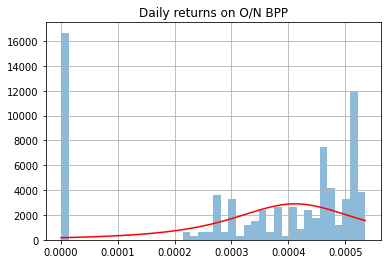

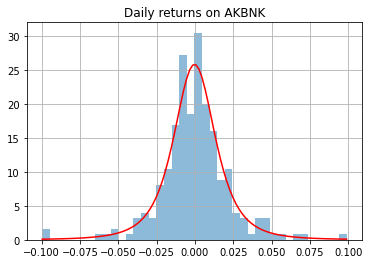

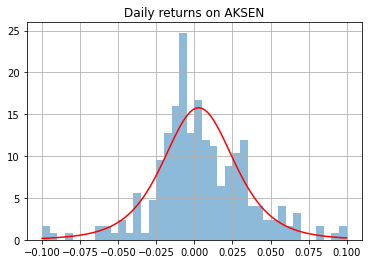

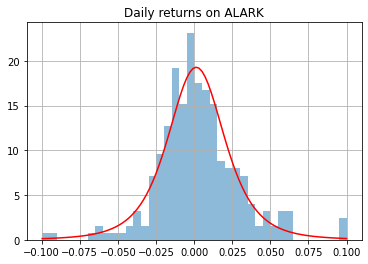

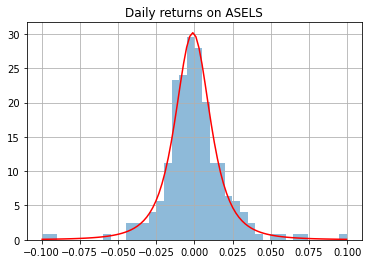

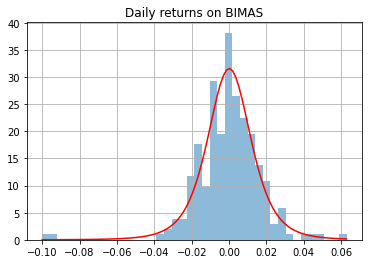

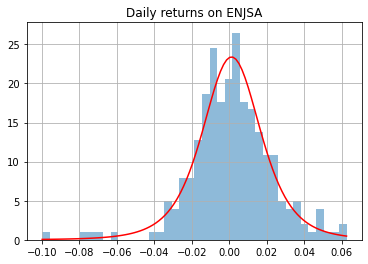

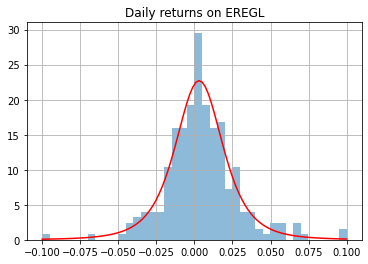

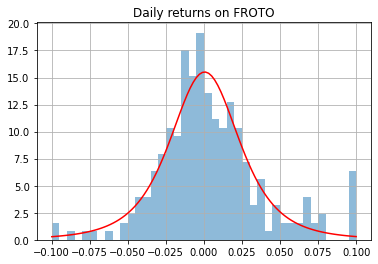

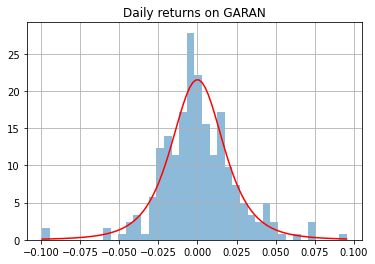

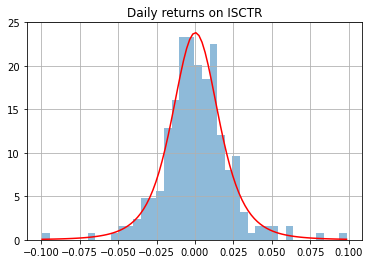

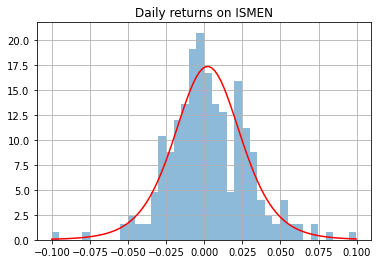

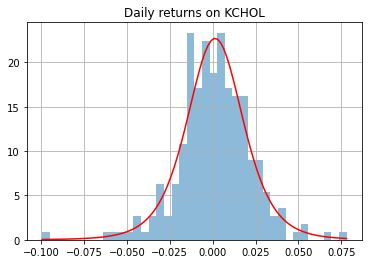

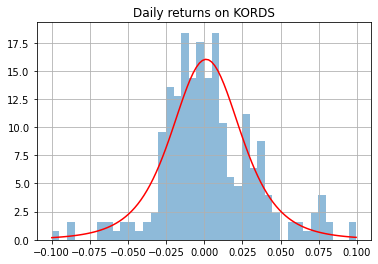

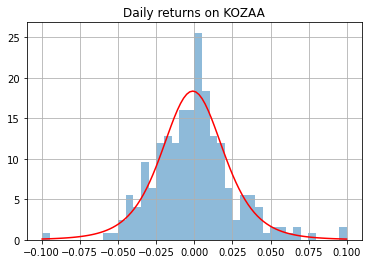

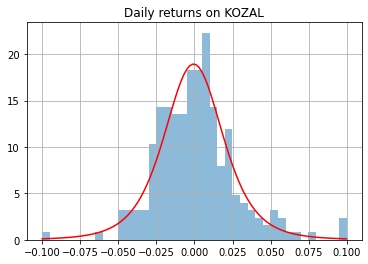

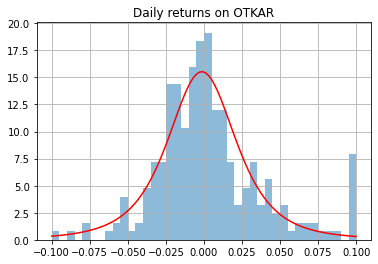

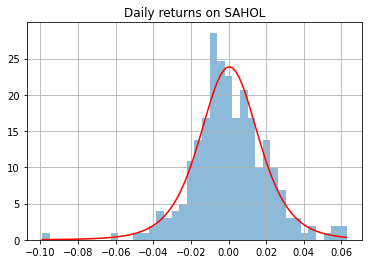

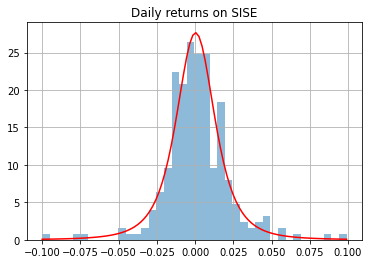

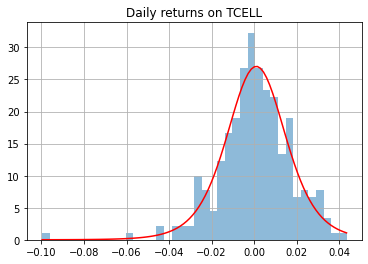

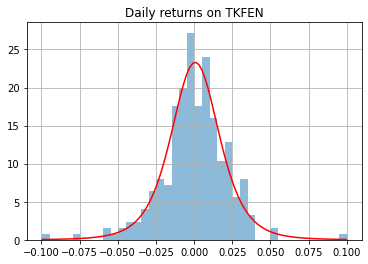

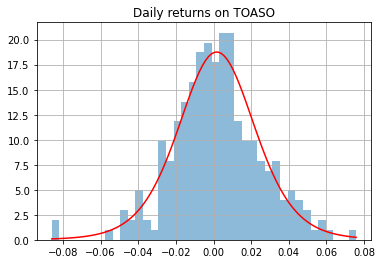

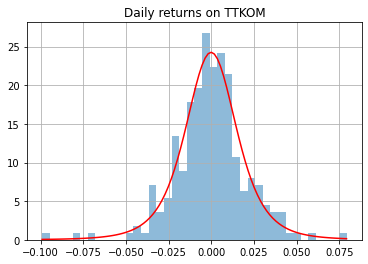

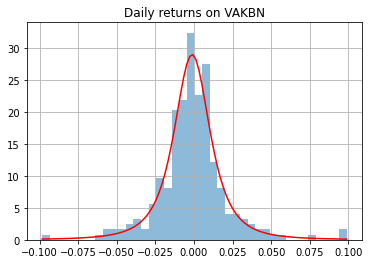

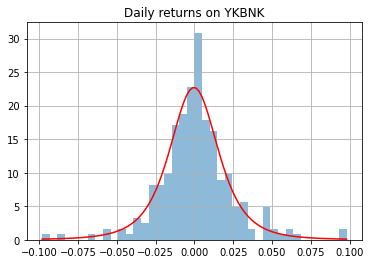

In [6]:
for i in uph_degisim.columns:
    tdf, tmean, tsigma = scipy.stats.t.fit(uph_degisim[i])
    support = np.linspace(uph_degisim[i].min(), uph_degisim[i].max(), 100)
    uph_degisim[i].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
    plt.plot(support,scipy.stats.t.pdf(support,loc=tmean,scale=tsigma,df=tdf),'-r')
    plt.title('Daily returns on {}'.format(i))
    plt.show()

In [7]:
stocks = list(uph_degisim.columns)

In [8]:
var_cov_matrix = uph_degisim.cov()

In [9]:
variances = {}
j = 0
for i in stocks:
    variances[i] = np.diag(var_cov_matrix)[j]
    j+=1

In [10]:
np.diag(var_cov_matrix)

array([3.81664795e-08, 5.08997994e-04, 9.55024045e-04, 7.38091222e-04,
       4.19326705e-04, 2.86374273e-04, 4.74382424e-04, 5.75083062e-04,
       1.17475780e-03, 5.96838517e-04, 4.78294211e-04, 6.85827691e-04,
       4.49555018e-04, 9.55817675e-04, 6.81671405e-04, 6.90865634e-04,
       1.24452217e-03, 4.08320046e-04, 4.63331277e-04, 3.05147115e-04,
       4.60725546e-04, 5.63245682e-04, 4.43748226e-04, 4.85614376e-04,
       5.75018436e-04])

In [11]:
variances

{'O/N BPP': 3.8166479537134326e-08,
 'AKBNK': 0.0005089979939727638,
 'AKSEN': 0.0009550240452337089,
 'ALARK': 0.0007380912216431268,
 'ASELS': 0.00041932670498303774,
 'BIMAS': 0.0002863742731817144,
 'ENJSA': 0.0004743824238741129,
 'EREGL': 0.0005750830619353889,
 'FROTO': 0.001174757796783034,
 'GARAN': 0.0005968385168405284,
 'ISCTR': 0.00047829421073946807,
 'ISMEN': 0.0006858276912061037,
 'KCHOL': 0.00044955501780379617,
 'KORDS': 0.0009558176747563503,
 'KOZAA': 0.000681671405413076,
 'KOZAL': 0.000690865633945559,
 'OTKAR': 0.0012445221711936867,
 'SAHOL': 0.0004083200455800594,
 'SISE': 0.00046333127672064004,
 'TCELL': 0.00030514711482902744,
 'TKFEN': 0.00046072554600743934,
 'TOASO': 0.0005632456822729981,
 'TTKOM': 0.00044374822641779553,
 'VAKBN': 0.00048561437577155703,
 'YKBNK': 0.0005750184360980108}

In [12]:
corr_matrix = uph_degisim.corr()

In [13]:
std_devs = {}
j = 0
for i in stocks:
    std_devs[i] = np.sqrt(np.diag(var_cov_matrix))[j]
    j+=1

In [14]:
std_devs

{'O/N BPP': 0.0001953624312326562,
 'AKBNK': 0.02256098388751616,
 'AKSEN': 0.030903463321021302,
 'ALARK': 0.027167834320076505,
 'ASELS': 0.020477468226883854,
 'BIMAS': 0.016922596525997848,
 'ENJSA': 0.021780321941470768,
 'EREGL': 0.023980889515099076,
 'FROTO': 0.03427473992290874,
 'GARAN': 0.024430278689374963,
 'ISCTR': 0.02186993851704819,
 'ISMEN': 0.026188312110674558,
 'KCHOL': 0.021202712510520822,
 'KORDS': 0.03091630111698924,
 'KOZAA': 0.026108837687899396,
 'KOZAL': 0.02628432296913046,
 'OTKAR': 0.035277785803444164,
 'SAHOL': 0.020206930632336504,
 'SISE': 0.021525131282309058,
 'TCELL': 0.017468460574104047,
 'TKFEN': 0.021464518303643324,
 'TOASO': 0.02373279760738287,
 'TTKOM': 0.021065332335802243,
 'VAKBN': 0.022036659814308454,
 'YKBNK': 0.023979542032699683}

In [15]:
rayic = [358090.73,
122640.00,
99600.00,
92700.00,
175820.00,
170510.00,
159987.66,
120160.00,
49280.00,
162600.00,
75520.00,
141050.00,
161160.00,
38000.00,
108960.00,
196320.00,
103700.00,
97370.00,
132480.00,
160160.00,
82550.00,
78137.50,
167500.00,
116000.00,
47250.00
]

In [16]:
no_day = 1 
CL = 0.99

In [17]:
rayic_degeler = {}
j = 0
for i in stocks:
    rayic_degeler[i] = rayic[j]
    j+=1

In [18]:
rayic_degeler

{'O/N BPP': 358090.73,
 'AKBNK': 122640.0,
 'AKSEN': 99600.0,
 'ALARK': 92700.0,
 'ASELS': 175820.0,
 'BIMAS': 170510.0,
 'ENJSA': 159987.66,
 'EREGL': 120160.0,
 'FROTO': 49280.0,
 'GARAN': 162600.0,
 'ISCTR': 75520.0,
 'ISMEN': 141050.0,
 'KCHOL': 161160.0,
 'KORDS': 38000.0,
 'KOZAA': 108960.0,
 'KOZAL': 196320.0,
 'OTKAR': 103700.0,
 'SAHOL': 97370.0,
 'SISE': 132480.0,
 'TCELL': 160160.0,
 'TKFEN': 82550.0,
 'TOASO': 78137.5,
 'TTKOM': 167500.0,
 'VAKBN': 116000.0,
 'YKBNK': 47250.0}

In [19]:
toplam_port = sum(rayic)

In [20]:
toplam_port

3217545.8899999997

In [21]:
var = {}
for i in stocks:
    var[i] = norm.ppf(CL)*std_devs[i]*rayic_degeler[i]*np.sqrt(no_day)

### Individual VaR

In [22]:
var

{'O/N BPP': 162.74542466946698,
 'AKBNK': 6436.7232281830475,
 'AKSEN': 7160.463737256758,
 'ALARK': 5858.809975906909,
 'ASELS': 8375.662994220058,
 'BIMAS': 6712.61149844629,
 'ENJSA': 8106.351652520843,
 'EREGL': 6703.473023541653,
 'FROTO': 3929.339240433942,
 'GARAN': 9241.098952517688,
 'ISCTR': 3842.2374572771823,
 'ISMEN': 8593.206668887562,
 'KCHOL': 7949.198494440269,
 'KORDS': 2733.0387123151468,
 'KOZAA': 6618.038526770557,
 'KOZAL': 12004.276729763687,
 'OTKAR': 8510.493287888477,
 'SAHOL': 4577.203050933845,
 'SISE': 6633.928501241141,
 'TCELL': 6508.536613672404,
 'TKFEN': 4122.046459972937,
 'TOASO': 4314.029451398292,
 'TTKOM': 8208.386258472352,
 'VAKBN': 5946.732658357413,
 'YKBNK': 2635.829750684524}

In [23]:
var_p = {}
for i in stocks:
    var_p[i] = var[i]/rayic_degeler[i]*100

In [24]:
var_p

{'O/N BPP': 0.04544809765655397,
 'AKBNK': 5.248469690299289,
 'AKSEN': 7.189220619735701,
 'ALARK': 6.320183361280376,
 'ASELS': 4.763771467535012,
 'BIMAS': 3.9367846451506012,
 'ENJSA': 5.06686056444656,
 'EREGL': 5.578789134105903,
 'FROTO': 7.973496835296149,
 'GARAN': 5.683332689125269,
 'ISCTR': 5.087708497453896,
 'ISMEN': 6.092312420338576,
 'KCHOL': 4.932488517274925,
 'KORDS': 7.1922071376714385,
 'KOZAA': 6.0738239048922145,
 'KOZAL': 6.114647885983948,
 'OTKAR': 8.206840200471047,
 'SAHOL': 4.700835011742678,
 'SISE': 5.007494339704968,
 'TCELL': 4.063771611933319,
 'TKFEN': 4.993393652299136,
 'TOASO': 5.52107432589767,
 'TTKOM': 4.900529109535732,
 'VAKBN': 5.12649367099777,
 'YKBNK': 5.578475662824389}

In [25]:
diag = np.diag(list(np.sqrt(np.diag(var_cov_matrix))))

In [26]:
portfoy_var_p = (np.sqrt(np.matmul(np.matmul(diag,corr_matrix).T,diag))*norm.ppf(CL)*np.sqrt(no_day)*100)[0][0]

### Undiversified VaR

In [27]:
portfoy_var = 0
for i in stocks:
    portfoy_var+= var[i]

In [28]:
portfoy_var

155884.46234977242

### Undiversified VaR %

In [29]:
(portfoy_var / toplam_port) * 100

4.844824834798936

### Diversified Var

In [97]:
weights = np.array(rayic)/sum(rayic)

In [98]:
avg_deg = uph_degisim.mean()

In [99]:
port_mean = avg_deg.dot(weights)
port_std = np.sqrt(weights.T.dot(var_cov_matrix).dot(weights))

In [100]:
mean_investment = (1+port_mean)*toplam_port
std_investment = toplam_port*port_std

In [101]:
cutoff = norm.ppf(0.01, mean_investment, std_investment)

In [102]:
var = toplam_port - cutoff

In [103]:
var

94939.2850511237

### Diversified VaR %

In [37]:
div_var_p = (var / toplam_port) *100

In [38]:
div_var_p

2.9506738457465707

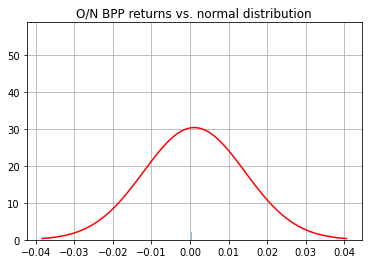

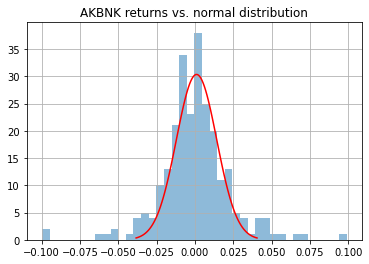

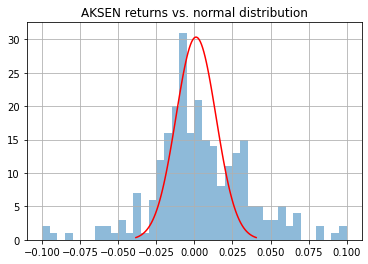

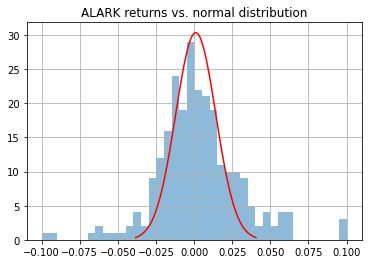

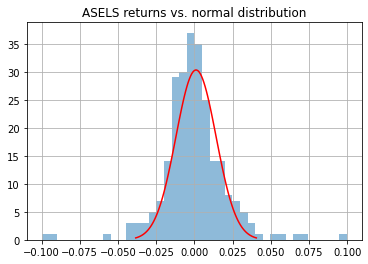

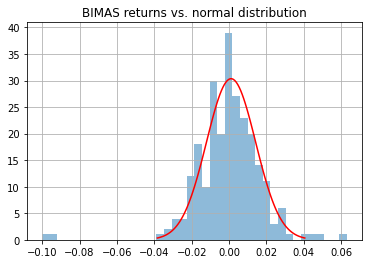

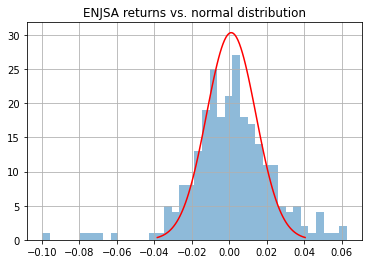

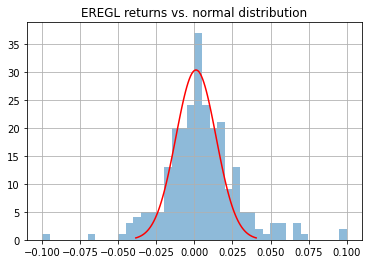

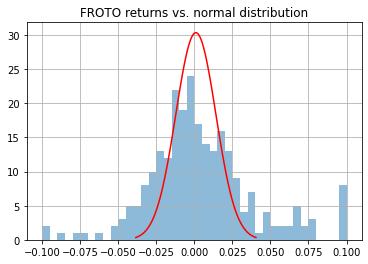

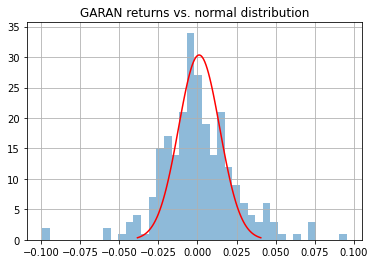

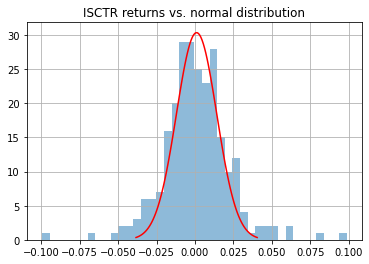

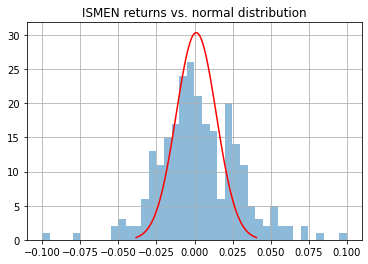

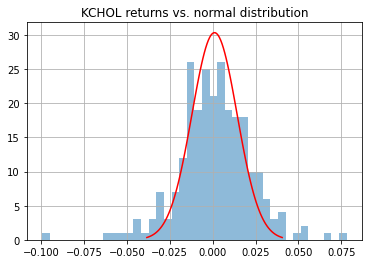

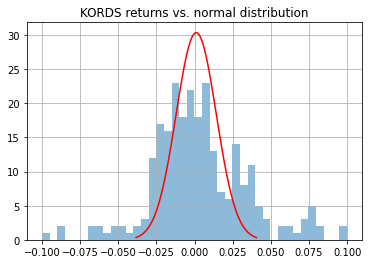

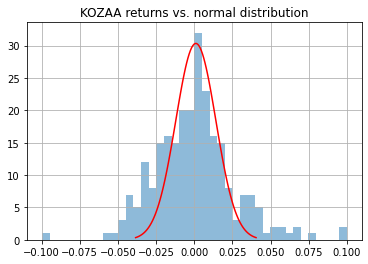

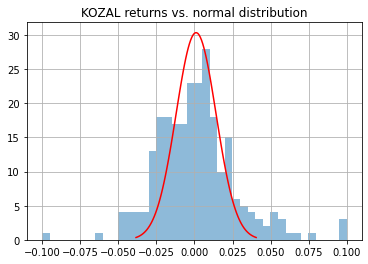

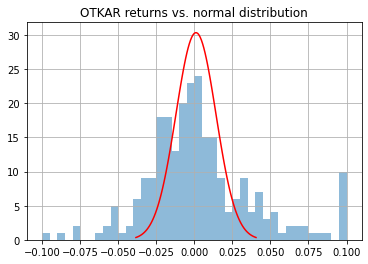

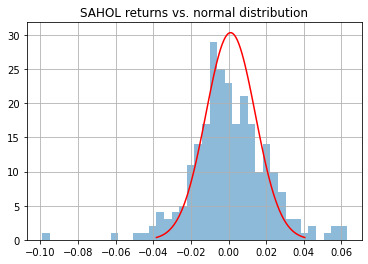

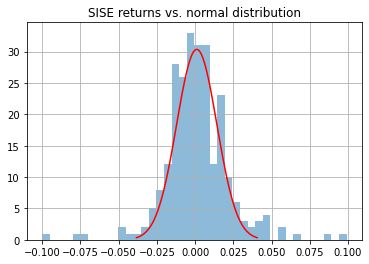

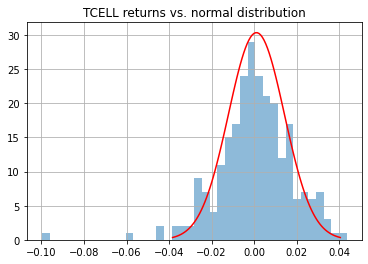

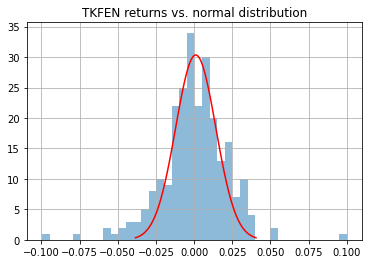

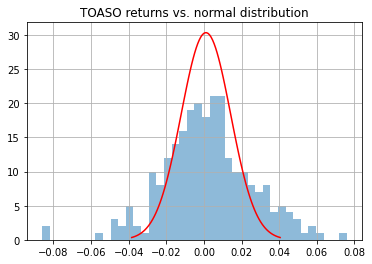

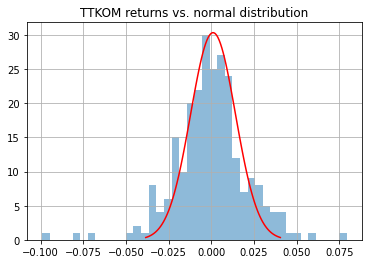

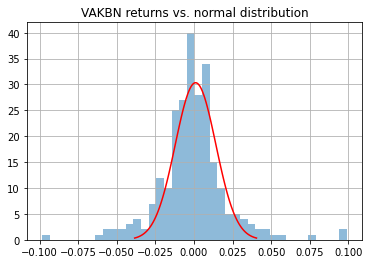

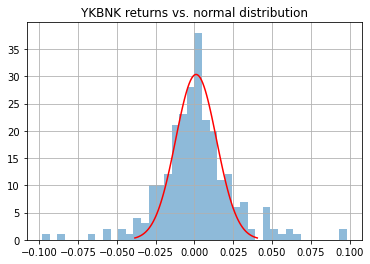

In [39]:
for i in uph_degisim.columns:
    uph_degisim[i].hist(bins=40, histtype='stepfilled', alpha=0.5)
    x = np.linspace(port_mean -3*port_std, port_mean+3*port_std,100)
    plt.plot(x,scipy.stats.norm.pdf(x,port_mean,port_std),'-r')
    plt.title('{} returns vs. normal distribution'.format(i))
    plt.show()

### CVaR

In [40]:
pf_returns = uph_degisim @ weights

In [41]:
pf_returns

Date
2020-07-29   -0.010500
2020-07-30   -0.010099
2020-08-04   -0.027811
2020-08-05    0.009724
2020-08-06   -0.042586
                ...   
2021-07-27    0.007435
2021-07-28    0.002391
2021-07-29    0.019336
2021-07-30    0.004560
2021-08-02    0.006106
Length: 251, dtype: float64

In [42]:
v = uph_degisim.cov()*250

In [43]:
cov_ip = v @ weights

In [44]:
vol_p_pct = np.sqrt(np.transpose(weights) @ v @ weights)

In [45]:
vol_p = np.sqrt(np.transpose(np.array(rayic)) @ v @ np.array(rayic))

In [46]:
vol_p

668771.3355325175

In [47]:
p_var = norm.ppf(0.99) * vol_p

In [48]:
p_var

1555794.774635526

In [49]:
p_var_pct = norm.ppf(0.99) * vol_p_pct

In [50]:
p_var_pct

0.48353460302489304

In [51]:
vol_i = np.sqrt(np.diag(v))

In [52]:
beta = sum(rayic) * (v @ np.array(rayic)) / (vol_p**2)

In [53]:
mvar = norm.ppf(0.99) * (v @ np.array(rayic)) / vol_p

In [54]:
mvar

O/N BPP    0.000275
AKBNK      0.646405
AKSEN      0.595405
ALARK      0.586817
ASELS      0.533014
BIMAS      0.289768
ENJSA      0.439431
EREGL      0.453933
FROTO      0.557183
GARAN      0.668404
ISCTR      0.617211
ISMEN      0.576173
KCHOL      0.629918
KORDS      0.563033
KOZAA      0.570179
KOZAL      0.525082
OTKAR      0.654542
SAHOL      0.565546
SISE       0.514106
TCELL      0.426854
TKFEN      0.526788
TOASO      0.485460
TTKOM      0.598176
VAKBN      0.605429
YKBNK      0.663378
dtype: float64

In [55]:
cvar = mvar * np.array(rayic)

### Individual ES

In [56]:
cvar

O/N BPP        98.418469
AKBNK       79275.067028
AKSEN       59302.386752
ALARK       54397.899173
ASELS       93714.442682
BIMAS       49408.405680
ENJSA       70303.607963
EREGL       54544.530386
FROTO       27458.001822
GARAN      108682.513795
ISCTR       46611.805203
ISMEN       81269.270814
KCHOL      101517.612941
KORDS       21395.236091
KOZAA       62126.723409
KOZAL      103084.026027
OTKAR       67875.996932
SAHOL       55067.200050
SISE        68108.762652
TCELL       68364.961308
TKFEN       43486.348060
TOASO       37932.664440
TTKOM      100194.520366
VAKBN       70229.755082
YKBNK       31344.617511
dtype: float64

###  Maximum Drawdown

In [57]:
df = pd.DataFrame(pf_returns)

In [58]:
df.rename(columns = {0:'returns'}, inplace=True)

In [59]:
cum_returns = (1+df).cumprod()

In [60]:
drawdown = 1-df.div(df.cummax())

In [61]:
drawdown.expanding().max()

,returns
Date,
2020-07-29,0.000000
2020-07-30,0.000000
2020-08-04,0.000000
2020-08-05,0.000000
2020-08-06,5.379494
...,...
2021-07-27,5.379494
2021-07-28,5.379494
2021-07-29,5.379494


In [62]:
df_dd = pd.concat([drawdown, drawdown.expanding().max()], axis=1)

In [63]:
df_dd.columns = ['drawdown', 'MDD']

In [64]:
df_dd

,drawdown,MDD
Date,,
2020-07-29,0.000000,0.000000
2020-07-30,0.000000,0.000000
2020-08-04,-1.753665,0.000000
2020-08-05,0.000000,0.000000
2020-08-06,5.379494,5.379494
...,...,...
2021-07-27,0.793075,5.379494
2021-07-28,0.933441,5.379494
2021-07-29,0.461815,5.379494


### Undiversified ES%

In [65]:
es_und_p = df_dd['MDD'].max()

In [66]:
es_und_p

5.379493504942567

### Undiversified ES

In [67]:
es_un = df_dd['MDD'].max() * toplam_port / 100

In [68]:
es_un

173087.6721710965

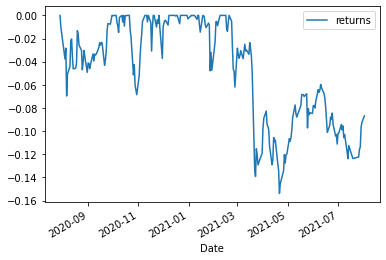

In [69]:
wealth_index = cum_returns*1000
previous_peaks = wealth_index.cummax()
drawdownn = (wealth_index - previous_peaks)/previous_peaks
drawdownn.plot()
matplotlib.axes.Axes.invert_xaxis
plt.show()

###  Marginal VaR

In [70]:
rayic_degerler_array = np.array(list(rayic_degeler.values()))

In [71]:
portfolio_variance = rayic_degerler_array @ var_cov_matrix @ np.transpose(rayic_degerler_array)
portfolio_stddev = np.sqrt(portfolio_variance)

In [72]:
portfolio_variance_returns = portfolio_variance/(toplam_port**2)
portfolio_stddev_returns = np.sqrt(portfolio_variance_returns)

In [73]:
Z = norm.ppf(0.99)

In [74]:
marginal_var = Z*(var_cov_matrix @ np.transpose(rayic_degerler_array)) / (toplam_port*portfolio_stddev_returns)

In [75]:
(marginal_var * rayic) 

O/N BPP       6.224530
AKBNK      5013.795469
AKSEN      3750.612256
ALARK      3440.425226
ASELS      5927.021771
BIMAS      3124.861950
ENJSA      4446.390578
EREGL      3449.698998
FROTO      1736.596515
GARAN      6873.685709
ISCTR      2947.989406
ISMEN      5139.919991
KCHOL      6420.537590
KORDS      1353.153542
KOZAA      3929.238991
KOZAL      6519.606253
OTKAR      4292.854975
SAHOL      3482.755531
SISE       4307.576372
TCELL      4323.779798
TKFEN      2750.318140
TOASO      2399.072347
TTKOM      6336.857868
VAKBN      4441.719712
YKBNK      1982.407674
dtype: float64

### Marginal VaR

In [76]:
sum(marginal_var * rayic)

98397.10119273244

### Marginal VaR % 

In [77]:
sum(marginal_var*100)/25

3.36276888589843

### Incremental VaR

In [78]:
rayic2 = [358090.73,
300000,
600000,
92700.00,
175820.00,
170510.00,
159987.66,
120160.00,
49280.00,
162600.00,
75520.00,
141050.00,
161160.00,
38000.00,
108960.00,
196320.00,
103700.00,
97370.00,
132480.00,
160160.00,
82550.00,
78137.50,
167500.00,
116000.00,
47250.00
]

In [79]:
rayic_degeler2 = {}
j = 0
for i in stocks:
    rayic_degeler2[i] = rayic2[j]
    j+=1

In [80]:
var2 = {}
for i in stocks:
    var2[i] = norm.ppf(CL)*std_devs[i]*rayic_degeler2[i]*np.sqrt(no_day)

In [81]:
port_var2 = 0
for i in stocks:
    port_var2+= var2[i]

### Undiversified Incremental Var

In [82]:
un_inc_var = port_var2 - portfoy_var

In [83]:
un_inc_var

45283.54582387229

###  Undiversified Incremental VaR %

In [84]:
(un_inc_var / (sum(rayic2)-toplam_port)) * 100

6.681354140679929

### Diversified Incremental VaR

In [90]:
weights2 = np.array(rayic2)/sum(rayic2)

In [92]:
toplam_port2 = sum(rayic2)

In [91]:
port_mean2 = avg_deg.dot(weights2)
port_std2 = np.sqrt(weights2.T.dot(var_cov_matrix)).dot(weights2)

In [93]:
mean_investment2 = (1+port_mean2)*toplam_port2
std_investment2 = toplam_port2*port_std2

In [94]:
cutoff2 = norm.ppf(0.01, mean_investment2, std_investment2)

In [95]:
var2 = toplam_port2 - cutoff2

In [104]:
div_inc_var = var2 - var

In [105]:
div_inc_var

21142.193843699526

### Diversified Incremental VaR%

In [108]:
div_inc_var_p = (div_inc_var/(toplam_port2-toplam_port))*100

In [109]:
div_inc_var_p

3.119421896202126

In [85]:
benchmark = pd.read_excel('benchmark.xlsx', index_col='Date')

In [86]:
benchmark

,Benchmark
Date,
2021-08-09,-1.412174
2021-08-09,-0.717836
2021-08-09,-3.349083
2021-08-09,0.406751
2021-08-09,-4.993199
...,...
2021-08-09,0.737743
2021-08-09,0.086451
2021-08-09,2.159171


In [87]:
benchmark.std()

Benchmark    1.36901
dtype: float64

In [88]:
benchmar_var = norm.ppf(CL)*benchmark.std()*toplam_port*np.sqrt(no_day)

In [89]:
benchmar_var

Benchmark    1.024722e+07
dtype: float64